# 線形回帰

## 目的
scikit-learn に同梱されている実験用データ[__`boston`__](../data_info/boston.ipynb)`を元に特徴量を増やした、mglearnのBostonデータセットを使用し、
- 重回帰
- Ridge回帰
- Lasso回帰
- Elastic回帰  

用いて、学習モデルの汎化・過剰適合・適合不足と__正則化__ の効果を検証する。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 訓練データとテストデータの分割
`scikit-learn` には、ランダムに抽出されたデータを訓練セットとテストセットに分割する `train_test_split` という関数が用意されている。  
分割に厳格な決まりはないが、一般的に、訓練セットに 75% 、残り 25% をテストセットとして割り当てる。


In [2]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()

# データ数は同じだが、特徴量は13 から 104 に増やしている。
X.shape

(506, 104)

In [3]:
from sklearn.model_selection import train_test_split

# デフォルトで訓練セット（train）に75%、テストセット (test) に25% 割り当てる。
# random_state パラメータを 用いる事で　擬似乱数生成器にシードを渡し、常に同じ結果が得られるようにする。
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 訓練セット
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}\n".format(y_train.shape))

# テストセット
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (379, 104)
y_train shape: (379,)

X_test shape: (127, 104)
y_test shape: (127,)


## 重回帰

In [4]:
from sklearn.linear_model import LinearRegression

# インスタンスを生成＆学習
lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("### LinearRegression coefficient.shape: {}".format(lr.coef_.shape))
print("### LinearRegression coefficient[:10]: \n{}\n".format(lr.coef_[:10]))
print("### Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("### Test set score: {:.2f}".format(lr.score(X_test, y_test)))

### LinearRegression coefficient.shape: (104,)
### LinearRegression coefficient[:10]: 
[-402.75223586  -50.07100112 -133.31690803  -12.00210232  -12.71068728
   28.3052585    54.49202725  -51.73393446   25.2602789    36.49907043]

### Training set score: 0.95
### Test set score: 0.61


scoreは決定係数 R<sup>2</sup>  
訓練セットでは 0.95 で、テストセットでは 0.61。  
訓練セットとテストセットのscoreが大きく異なる場合、過学習（過剰適合）している可能性がある。

## リッジ回帰（L2正則化）
回帰係数の絶対値を可能な限り小さくして、個々の特徴量の出力に与える影響をなるべく小さくする。（__L2正則化__）

In [6]:
from sklearn.linear_model import Ridge

# L2正則化（alpha=1.0）
ridge = Ridge().fit(X_train, y_train)

print("### Ridge coefficient.shape: {}".format(ridge.coef_.shape))
print("### Ridge coefficient[:10]: \n{}\n".format(ridge.coef_[:10]))

print("### Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("### Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

### Ridge coefficient.shape: (104,)
### Ridge coefficient[:10]: 
[-1.45195306 -1.55625501 -1.45850339 -0.12825304 -0.0852752   8.32260468
  0.25413771 -4.94126282  3.90318054 -1.05389293]

### Training set score: 0.89
### Test set score: 0.75


スコアは、訓練セットでは 0.89 で、テストセットでは 0.75となり、LinearRegressionの時よりも汎化性能が高まっている。  

Ridgeモデルはモデルの簡潔さ（係数≒０）と訓練セットに対する性能がトレードオフになる。  
どちらに優先するかは、ハイパーパラメータ__`alpah`__で指定する事ができる。（デフォルトは1.0）　　

alpahは大きな値になるほど、係数がゼロに近づいていく。

In [7]:
# L2正則化（alpha=10）
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("### Ridge coefficient.shape: {}".format(ridge10.coef_.shape))
print("### Ridge coefficient[:10]: \n{}\n".format(ridge10.coef_[:10]))

print("### Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("### Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

### Ridge coefficient.shape: (104,)
### Ridge coefficient[:10]: 
[-0.8136899   0.6476241  -0.80906937  0.31119823 -0.68592593  4.38593449
 -0.14744567 -2.44271803  0.84635301 -1.1469339 ]

### Training set score: 0.79
### Test set score: 0.64


In [8]:
# L2正則化（alpha=0.1）
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("### Ridge coefficient.shape: {}".format(ridge01.coef_.shape))
print("### Ridge coefficient[:10]: \n{}\n".format(ridge01.coef_[:10]))

print("### Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("### Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

### Ridge coefficient.shape: (104,)
### Ridge coefficient[:10]: 
[ -2.42369024  -5.44004823  -6.06891063  -0.7843886    1.24386681
  18.97027054   4.36613313 -11.16632974   9.56288401  -0.72075494]

### Training set score: 0.93
### Test set score: 0.77


Ridgeの係数をプロットしてみる。

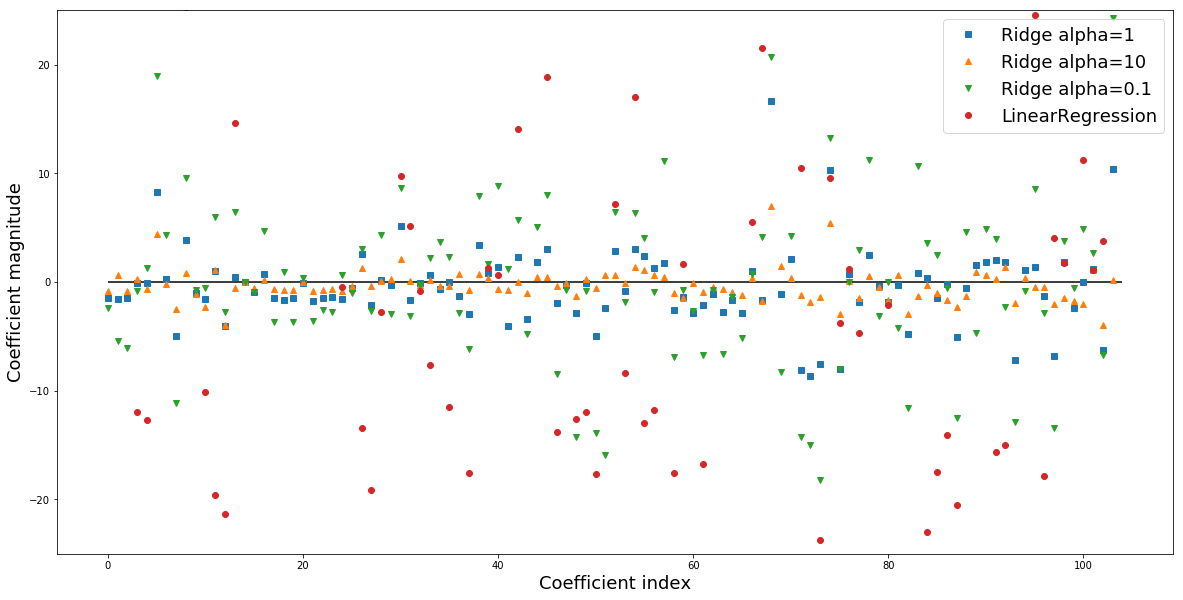

In [9]:
plt.figure(figsize=(20,10))

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index", fontsize=18)
plt.ylabel("Coefficient magnitude", fontsize=18)

# LinearRegressionを軸となるように設定
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)

plt.legend(fontsize=18)

### 学習曲線（Learning curve)
alphaの値を固定して、訓練データの量を変化させた際のscoreの推移を下図に記す。  
十分な訓練データ（今回は400付近）があれば、正則化はあまり、重要でなくなると言う事が分かる。

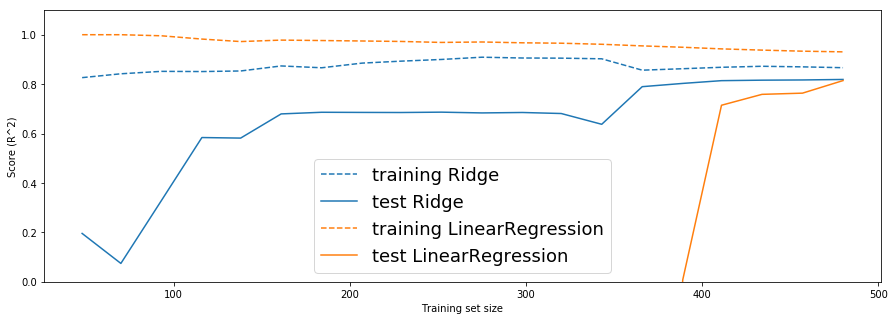

In [10]:
plt.figure(figsize=(15,5))
mglearn.plots.plot_ridge_n_samples()
plt.legend(fontsize=18)

## Lasso(L1正則化）
Ridgeと同じ様に係数がゼロになる様に制約をかけるが、L1正則化の場合、いつくかの係数を__完全にゼロ__にする。  
係数がゼロになると言う事は、自動的に特徴量を選択している事と同義であり、モデルの解釈がしやすくなる。

In [11]:
from sklearn.linear_model import Lasso

# L1正則化（alpha=1.0）
lasso = Lasso().fit(X_train, y_train)
  
print("### Lasso coefficient.shape: {}".format(lasso.coef_.shape))
print("### Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print("### Lasso coefficient[:10]: \n{}\n".format(lasso.coef_[:10]))

print("### Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("### Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

### Lasso coefficient.shape: (104,)
### Number of features used: 4
### Lasso coefficient[:10]: 
[-0.  0. -0.  0. -0.  0. -0.  0. -0. -0.]

### Training set score: 0.29
### Test set score: 0.21


__`Number of features used: 4`__より使用されている特徴量は４個である事が分かる。  

Ridgeと同様にLassoにもハイパーパラメータ__`alpah`__が存在する。（デフォルトは1.0）　

alpahは大きな値になるほど、係数がゼロに近づいていく。　

In [12]:
# L1正則化（alpha=0.01）
# 警告防止の為、max_iter（最大繰り返し回数）を指定
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)
  
print("### Lasso coefficient.shape: {}".format(lasso001.coef_.shape))
print("### Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))
print("### Lasso coefficient[:10]: \n{}\n".format(lasso001.coef_[:10]))

print("### Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("### Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))

### Lasso coefficient.shape: (104,)
### Number of features used: 33
### Lasso coefficient[:10]: 
[-0.         -0.         -0.          0.         -0.          0.
 -0.         -1.30683918 10.94664016  0.        ]

### Training set score: 0.90
### Test set score: 0.77


Ridge回帰よりも少し性能が良いだけだが、104あった特徴量の内、33しか使用していない事が分かる。　　
（モデルが理解しやすくなっている）

In [13]:
# L1正則化（alpha=0.0001）
# 警告防止の為、max_iter（最大繰り返し回数）を指定
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
  
print("### Lasso coefficient.shape: {}".format(lasso00001.coef_.shape))
print("### Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))
print("### Lasso coefficient[:10]: \n{}\n".format(lasso00001.coef_[:10]))

print("### Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("### Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))

### Lasso coefficient.shape: (104,)
### Number of features used: 94
### Lasso coefficient[:10]: 
[ -0.         -21.97767431 -86.22453095  -8.90879454  -1.77448733
  37.70625578  47.80054726 -38.78655266  26.97072618   0.        ]

### Training set score: 0.95
### Test set score: 0.64


alphaを小さくしすぎると、Ridge回帰の場合と同様に正則化の効果が薄れ、過剰適合が発生する。

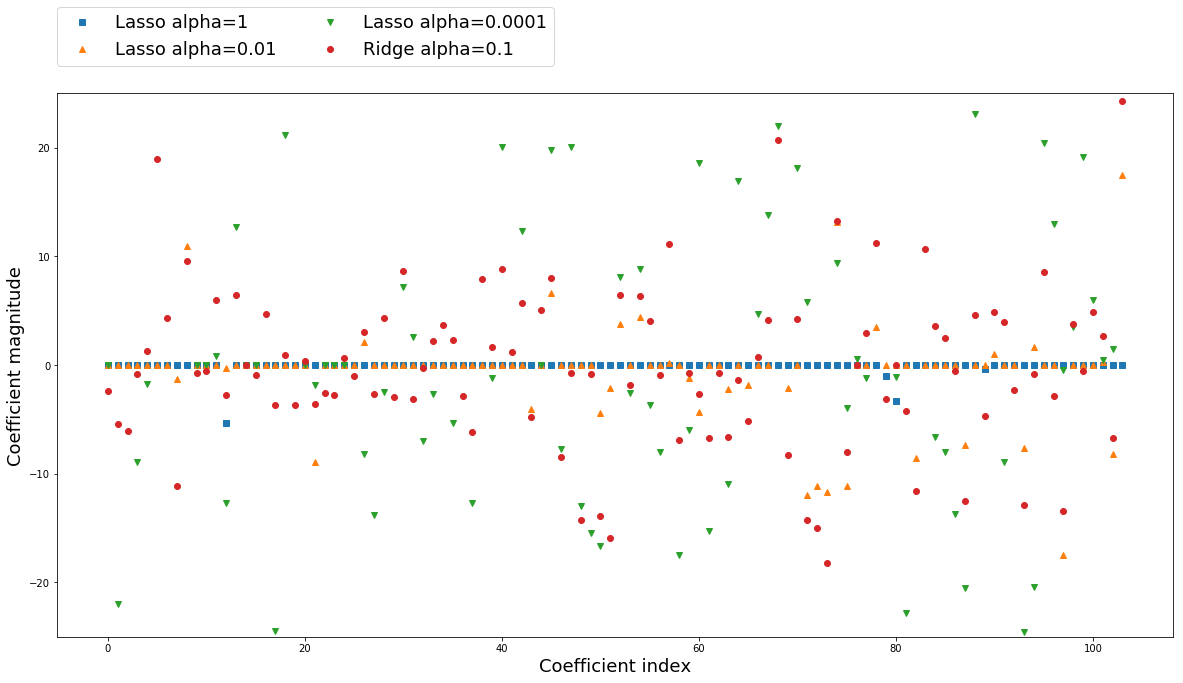

In [14]:
plt.figure(figsize=(20,10))

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.ylim(-25, 25)
plt.xlabel("Coefficient index", fontsize=18)
plt.ylabel("Coefficient magnitude", fontsize=18)

plt.legend(ncol=2, loc=(0, 1.05),fontsize=18)


## ElasticNet
LassoとRidgeのペナルティーを組み合わせた回帰モデル。  
最良の結果をもたらすが、L1とL2正則化のパラメータの２つを調整する必要がある。

In [15]:
from sklearn.linear_model import ElasticNet

en = ElasticNet().fit(X_train, y_train)

print("### ElasticNet coefficient.shape: {}".format(en.coef_.shape))
print("### Number of features used: {}".format(np.sum(en.coef_ != 0)))
print("### ElasticNet coefficient[:10]: \n{}\n".format(en.coef_[:10]))

print("### Training set score: {:.2f}".format(en.score(X_train, y_train)))
print("### Test set score: {:.2f}".format(en.score(X_test, y_test)))

### ElasticNet coefficient.shape: (104,)
### Number of features used: 38
### ElasticNet coefficient[:10]: 
[-0.          0.07847328 -0.39544504  0.         -0.03773639  0.36147212
 -0.12250665  0.         -0.21072681 -0.50505697]

### Training set score: 0.33
### Test set score: 0.22


ElasticNetのパラメータを見てみる。

In [16]:
en

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

- alpha
デフォルトは1.0。大きい程、係数がゼロに近づいていく。__`alpha = 0`__ は LinearRegressionと同じ。 

- l1_ratio
L1正則化の割合。  
0 <= l1_ratio <= 1 まで指定できる。l1_ratio = 0 とするとL2正則化を行なっているのと同じ。

In [17]:
en = ElasticNet(alpha=0.01, l1_ratio = 0.3).fit(X_train, y_train)

print("### ElasticNet coefficient.shape: {}".format(en.coef_.shape))
print("### Number of features used: {}".format(np.sum(en.coef_ != 0)))
print("### ElasticNet coefficient[:10]: \n{}\n".format(en.coef_[:10]))

print("### Training set score: {:.2f}".format(en.score(X_train, y_train)))
print("### Test set score: {:.2f}".format(en.score(X_test, y_test)))

### ElasticNet coefficient.shape: (104,)
### Number of features used: 88
### ElasticNet coefficient[:10]: 
[-1.18814584 -0.0464574  -0.824588    0.         -0.40937176  6.16029952
  0.         -3.76289739  1.98929912 -1.286241  ]

### Training set score: 0.85
### Test set score: 0.71


## まとめ
- 汎化とは未知のデータに対して上手く機能する様に学習する事。
- 訓練データの適度に学習しきれていない状態を適合不足と言う。
- 逆に、訓練データを学習し過ぎて、未知のデータに対応しきれない状態を過剰適合と言う。
- ハイパーパラメータを調整する事で、汎化を目指す。
- L1正則化は、特徴量のいくつかの係数を完全にゼロにする。（モデルが理解し易くなる。）
- L2正則化は、特徴量の係数をゼロに近づける事で各特徴量の出力への影響を抑える。
- ElasticNetはL1,L2正則化の良い所取りだが、ハイパーパラメータの調整が難しい。
- 実務では、まずRidge回帰を試し、重要な特徴量が限られている事が予想されるならば、Lasso回帰を試した方が良い。
- サンプル数が大きければ、正則化の効果は得にくくなる。